In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('data/Electric_Production.csv', parse_dates=['DATE'], index_col='DATE')

# Выбор целевого столбца
target = data['IPG2211A2N'].values.reshape(-1, 1)

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(target)

In [7]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 60  
X, y = create_sequences(scaled_data, seq_length)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [21]:
model = Sequential()


model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=100, return_sequences=False))


model.add(Dense(units=25))
model.add(Dense(units=1)) 

model.compile(optimizer='adam', loss='mean_squared_error')


model.summary()


o:\Программирование\Repos\MLCourse\MLcourse\.venv311keras\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         2,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,751 (483.40 KB)

 Trainable params: 123,751 (483.40 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=500,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0108 - val_loss: 0.0159
Epoch 2/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0107 - val_loss: 0.0158
Epoch 3/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0104 - val_loss: 0.0159
Epoch 4/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0108 - val_loss: 0.0160
Epoch 5/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0113 - val_loss: 0.0151
Epoch 6/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0103 - val_loss: 0.0153
Epoch 7/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0098 - val_loss: 0.0147
Epoch 8/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0095 - val_loss: 0.0159
Epoch 9/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0095 - val_loss: 0.0152
Epoch 10/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0093 - val_loss: 0.0154
Epoch 11/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0087 - val_loss: 0.0145
Epoch 12/500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0097 - val_lo

In [26]:

predictions = model.predict(X_test)


predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


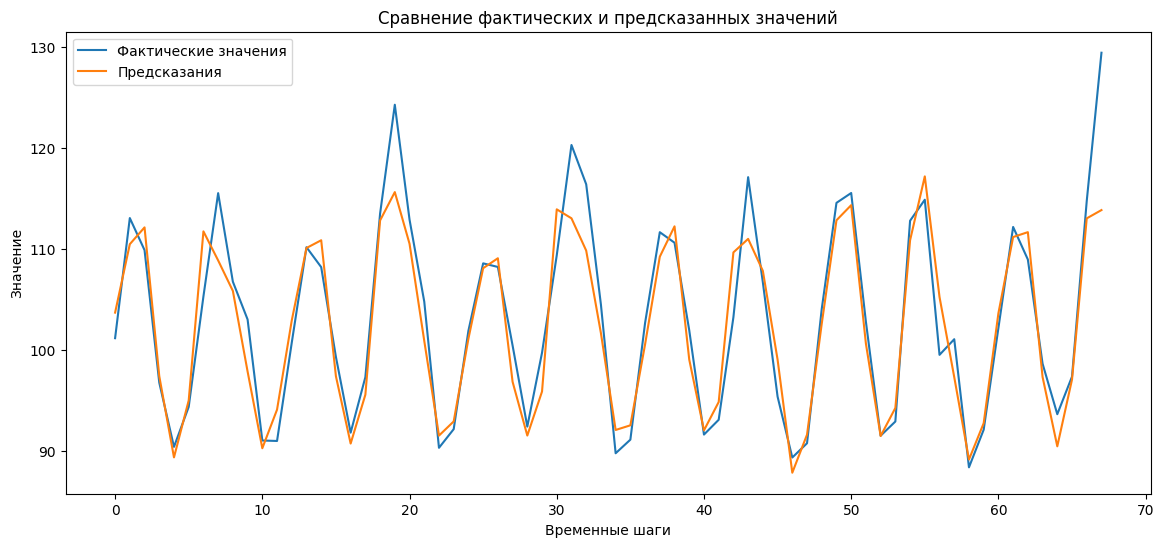

In [27]:
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Фактические значения')
plt.plot(predictions, label='Предсказания')
plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Временные шаги')
plt.ylabel('Значение')
plt.legend()
plt.show()


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_actual, predictions)
mae = mean_absolute_error(y_test_actual, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')


MSE: 12.977636940537138
MAE: 2.597053445614086


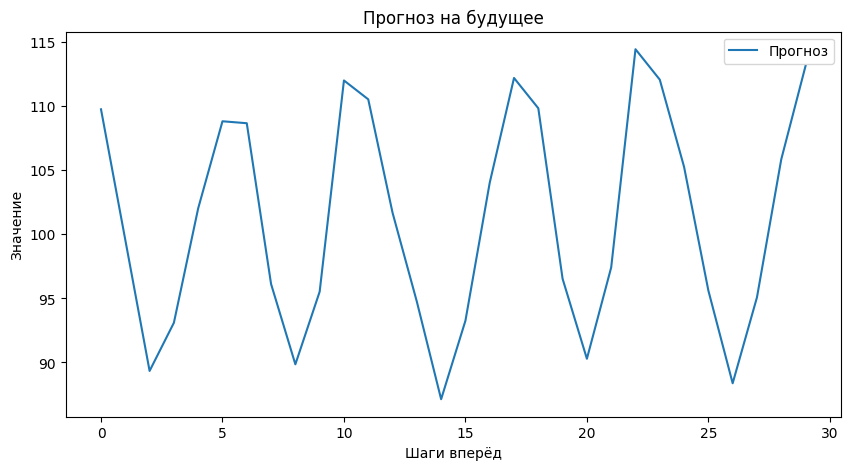

In [29]:
def predict_future(model, data, seq_length, steps):
    predictions = []
    # Начальная последовательность: последние seq_length точек
    current_sequence = data[-seq_length:].reshape(1, seq_length, 1)
    
    for _ in range(steps):
        # Предсказание
        pred = model.predict(current_sequence, verbose=0)
        predictions.append(pred[0, 0])
        
        # Обновление последовательности: сдвигаем окно и добавляем новое предсказание
        # 1. Берём срез без первого элемента: (1, seq_length-1, 1)
        shifted = current_sequence[:, 1:, :]
        # 2. Добавляем новое предсказание в конец: (1, 1, 1)
        new_pred = np.array([[[pred[0, 0]]]])
        # 3. Соединяем по оси временных шагов (axis=1)
        current_sequence = np.concatenate([shifted, new_pred], axis=1)
    
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


# Прогноз на следующие 30 шагов
future_predictions = predict_future(model, scaled_data, seq_length, 30)

plt.figure(figsize=(10, 5))
plt.plot(future_predictions, label='Прогноз')
plt.title('Прогноз на будущее')
plt.xlabel('Шаги вперёд')
plt.ylabel('Значение')
plt.legend()
plt.show()
